In [5]:
import gurobipy as gp
import numpy as np
from collections import namedtuple
import networkx as nx

In [6]:
def plot_graph(nodes, arcs):
    G = nx.Graph()
    ni = [(n1.id, {'pos': (n1.x, n1.y), 'label': '${}$'.format(n1.id)}) for n1 in nodes]
    G.add_nodes_from(ni)
    G.add_edges_from(arcs)
    pos = nx.get_node_attributes(G,'pos')
    label = nx.get_node_attributes(G,'label')
    nx.draw(G,pos)
    nx.draw_networkx_labels(G,pos,label)

In [7]:
Node = namedtuple('Node', ['id', 'x', 'y'])

def distances(n1,n2):
    return np.sqrt((n1.x - n2.x)**2 + (n1.y - n2.y)**2)

In [8]:

n = 10
N = range(n)
A = [(i,j) for i in N for j in N if i != j]
nodes = [Node(i,np.random.randint(-100,100), np.random.randint(-100,100)) for i in N]

c = {(i.id,j.id): distances(i,j)  for i in nodes for j in nodes if i.id != j.id}

Restricted license - for non-production use only - expires 2023-10-25
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 10 rows, 22 columns and 44 nonzeros
Model fingerprint: 0x0aad310d
Variable types: 0 continuous, 22 integer (22 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 334.5610519
Presolve removed 2 rows and 5 columns
Presolve time: 0.02s
Presolved: 8 rows, 17 columns, 34 nonzeros
Variable types: 0 continuous, 17 integer (17 binary)

Root relaxation: objective 1.401525e+02, 2 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     140.1525469  140.15255 

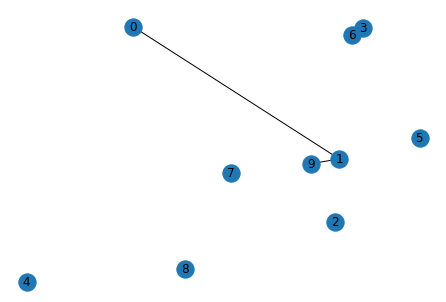

In [9]:
s = 0
t = n - 1

A = [(i,j) for i in N for j in N if i != j and j != s and i != t and np.random.rand() < 0.3]

m1 = gp.Model('RMC')

x = m1.addVars(A, vtype = gp.GRB.BINARY, name='x', obj=c)
# m1.addConstr(gp.quicksum((x[s,j] for j in N if (s,j) in A)) == 1)
# m1.addConstr(gp.quicksum((x[i,t] for i in N if (i,t) in A)) == 1)

m1.addConstr(x.sum(s,'*') == 1, name='r1')
m1.addConstr(x.sum('*',t) == 1, name='r2')
m1.addConstrs((x.sum('*',j) == x.sum(j,'*') for j in N if j != s and j != t), name='r3')

m1.write('RMC.lp')
m1.optimize()
values = m1.getAttr('x',x)
sol = [ (i,j) for i,j in values if values[i,j] > 0.5]

plot_graph(nodes, sol)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 109 rows, 180 columns and 432 nonzeros
Model fingerprint: 0x2ace38ea
Variable types: 0 continuous, 180 integer (90 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [6e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Presolve removed 9 rows and 9 columns
Presolve time: 0.00s
Presolved: 100 rows, 171 columns, 414 nonzeros
Variable types: 0 continuous, 171 integer (81 binary)
Found heuristic solution: objective 1054.3517614
Found heuristic solution: objective 687.5962336

Root relaxation: objective 3.740893e+02, 48 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  374.08931    0    6  687.59623  374.08931  45.6%     

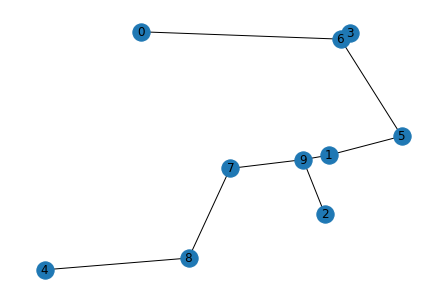

In [10]:
A = [(i,j) for i in N for j in N if i != j]
m2 = gp.Model('MST')

s = 0

x = m2.addVars(A, vtype = gp.GRB.BINARY, name='x', obj=c)
f = m2.addVars(A, vtype = gp.GRB.INTEGER, name='f')

m2.addConstr(f.sum(s,'*') == n - 1, name='r1')
m2.addConstrs((f[i,j] <= n*x[i,j]  for i,j in A), name='r2')
m2.addConstrs((f.sum('*',j) - 1 == f.sum(j,'*')   for j in N if j != s), name='r3')
m2.addConstrs((x.sum('*',j) == 1  for j in N if j != s), name='r4')
m2.write('MST.lp')
m2.optimize()
values = m2.getAttr('x', x)
sol = [ (i,j) for i,j in values if values[i,j] > 0.5]

plot_graph(nodes, sol)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 111 rows, 110 columns and 310 nonzeros
Model fingerprint: 0x8fadbf0d
Variable types: 0 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 745.5557074
Presolve time: 0.00s
Presolved: 111 rows, 110 columns, 310 nonzeros
Variable types: 0 continuous, 110 integer (110 binary)
Found heuristic solution: objective 509.8430333

Root relaxation: objective 3.228870e+02, 44 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     322.8869896  322.88699  0.00%     -    0s

Explored 1 nodes (44 simplex

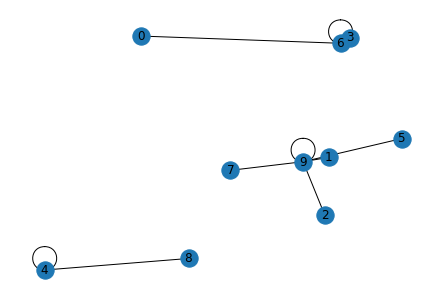

In [11]:
A = [(i,j) for i in N for j in N]
p = 3

m3 = gp.Model('p-median')

x = m3.addVars(A, vtype = gp.GRB.BINARY, name='x', obj=c)
y = m3.addVars(N, vtype = gp.GRB.BINARY, name='y')

m3.addConstrs((x.sum(i,'*') == 1 for i in N), name='r1')
m3.addConstr(y.sum('*') == p, name='r2')
m3.addConstrs((x[i,j] <= y[j] for i,j in A), name='r1')

m3.write('p-median.lp')
m3.optimize()
values = m3.getAttr('x', x)
sol = [ (i,j) for i,j in values if values[i,j] > 0.5]

plot_graph(nodes, sol)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 11 rows, 20 columns and 42 nonzeros
Model fingerprint: 0xbc257277
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 3e+00]
Found heuristic solution: objective 4.0000000
Presolve removed 11 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 7 4 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.000000000000e+00, best bound 7.000000000000e+00, gap 0.0000%
[0, 1, 2, 3, 5, 6, 9] [0, 1, 6]


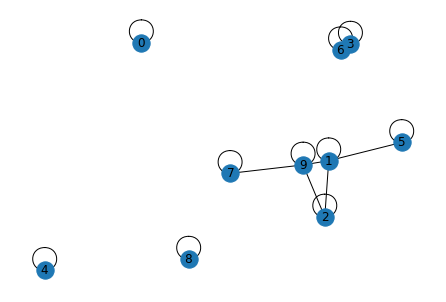

In [12]:
m4 = gp.Model('max-covering')
c = {(i.id,j.id): distances(i,j)  for i in nodes for j in nodes}

p = 3
S = 50
A = [(i,j) for i in N for j in N if c[i,j] <= S]

x = m4.addVars(N, vtype = gp.GRB.BINARY, name='x')
y = m4.addVars(N, vtype = gp.GRB.BINARY, name='y')

m4.setObjective(x.sum('*'), gp.GRB.MAXIMIZE)

m4.write('max-covering.lp')

m4.addConstr(y.sum('*') == p, name='r1')
m4.addConstrs((x[i] == gp.quicksum(y[j] for h,j in A if h == i) for i in N), name='r2')

m4.optimize()
values_y = m4.getAttr('x', y)
values_x = m4.getAttr('x', x)
sol_y = [ i for i in values_y if values_y[i] > 0.5]
sol_x = [ i for i in values_x if values_x[i] > 0.5]
print(sol_x, sol_y)
plot_graph(nodes,A)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 10 rows, 10 columns and 22 nonzeros
Model fingerprint: 0x07206799
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 6.0000000
Presolve removed 10 rows and 10 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: 6 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.000000000000e+00, best bound 6.000000000000e+00, gap 0.0000%
[0, 1, 3, 4, 8, 9]


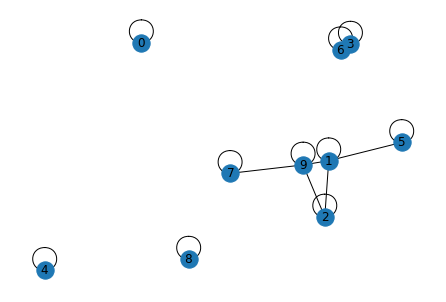

In [13]:
m5 = gp.Model('set-covering')
c = {(i.id,j.id): distances(i,j)  for i in nodes for j in nodes}

p = 3
S = 50
A = [(i,j) for i in N for j in N if c[i,j] <= S]

y = m5.addVars(N, vtype = gp.GRB.BINARY, name='y')

m5.setObjective(y.sum('*'))

m5.addConstrs(( gp.quicksum(y[j] for h,j in A if h == i) >= 1 for i in N), name='r1')
m5.write('set-covering.lp')
m5.optimize()
values = m5.getAttr('x', y)
sol = [ i for i in values if values[i] > 0.5]
print(sol)
plot_graph(nodes,A)